# 参数设置

In [40]:
# 数据集文件夹名
wine.dataset.folder <- "datasets"

# 图像文件夹名
figure.folder <- "figures"

# 模型结果文件夹名
model.summary.folder <- "model-summary"

# 数据集名称
red.wine.filename <- "winequality-red.csv"
white.wine.filename <- "winequality-white.csv"

# 酒品分析结果文件夹
red.wine.folder <- "red-wine"
white.wine.folder <- "white-wine"

# 分割线
seperation.line <- "-------------------------------------------------------------------------\n"

# 加载 packages
library(ggplot2)

# 读取数据

In [41]:
# 读取红酒数据
red.wine.path <- file.path(wine.dataset.folder, red.wine.filename)
red.wine <- read.csv(red.wine.path,sep = ";")

white.wine.path <- file.path(wine.dataset.path, white.wine.filename)
white.wine <- read.csv(white.wine.path, sep = ";")

cat(seperation.line)
str(red.wine)
cat(seperation.line)
str(white.wine)
cat(seperation.line)

-------------------------------------------------------------------------
'data.frame':	1599 obs. of  12 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
---------

# 描述性统计

## 酒品频率统计

In [42]:
# 获取频率直方图
frequency_table <- table(red.wine$quality)
red.wine.quality.frequency.figure.path <- file.path(red.wine.folder, figure.folder, "quality-frequency.png")

# 保存图像
png(filename = red.wine.quality.frequency.figure.path) 
barplot(frequency_table, main = "Frequency of Integer Values", xlab = "Integer Values", ylab = "Frequency")
dev.off()

png 
  2

## 特征与酒品箱线图

### pH-酒品箱线图

Saving 6.67 x 6.67 in image


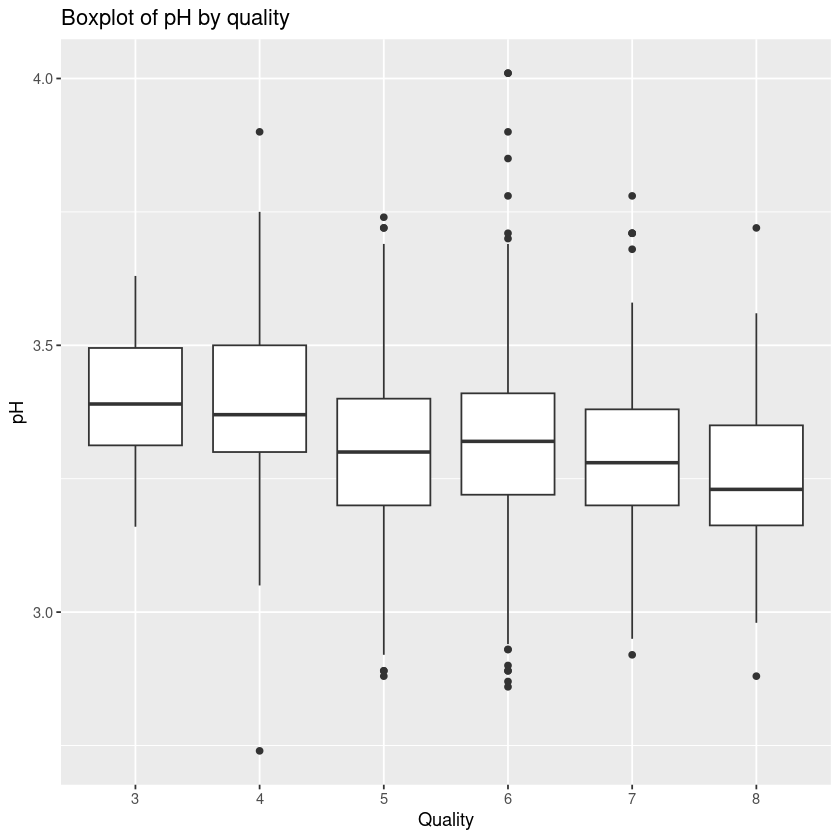

In [43]:
# 获取箱线图数据
num_categories <- 5  # 设定分成的类别数量

# 绘图
figure.path <- file.path(red.wine.folder, figure.folder, "pH-boxplot.png")
ggplot(red.wine, aes(x = factor(quality), y = pH,group = factor(quality))) +
  geom_boxplot() +
  labs(x = "Quality", y = "pH", title = "Boxplot of pH by quality")
ggsave(figure.path)

### 固定酸度-酒品箱线图

Saving 6.67 x 6.67 in image


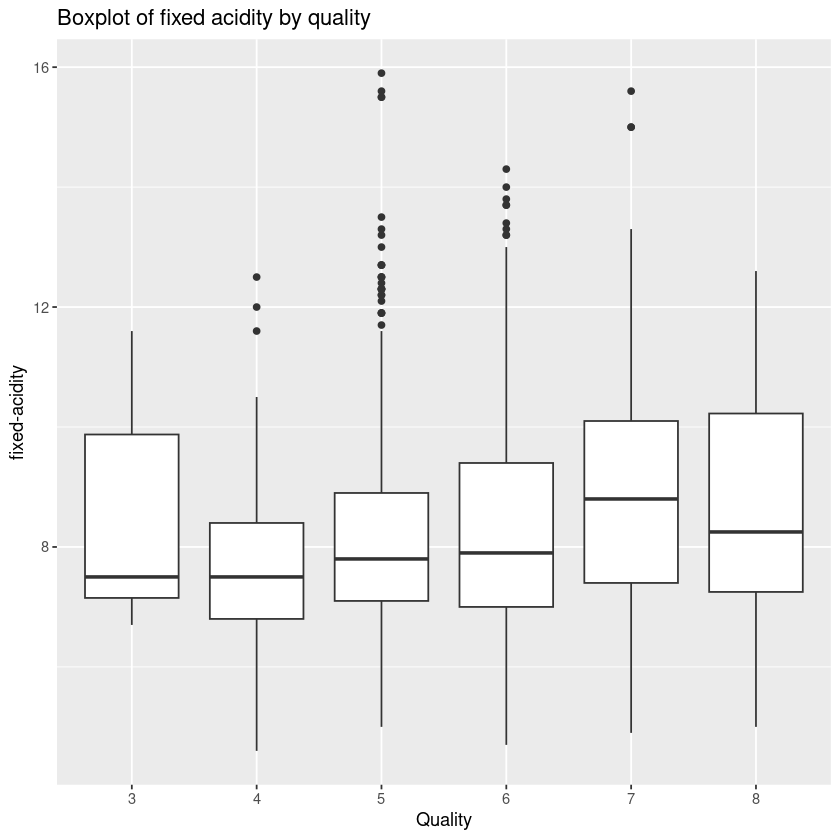

In [44]:
# 获取箱线图数据
num_categories <- 5  # 设定分成的类别数量

# 绘图
figure.path <- file.path(red.wine.folder, figure.folder, "fixed-acidity-boxplot.png")
ggplot(red.wine, aes(x = factor(quality), y = fixed.acidity,group = factor(quality))) +
  geom_boxplot() +
  labs(x = "Quality", y = "fixed-acidity", title = "Boxplot of fixed acidity by quality")
ggsave(figure.path)

# 模型拟合

In [45]:
save_red_wine_model_summary <- function(model, file_name) {
  # 创建完整文件路径
  file_path <- file.path(red.wine.folder, model.summary.folder, paste0(file_name, ".txt"))

  # 将summary输出捕获到字符向量
  summary_text <- capture.output(summary(model))

  # 将summary输出写入txt文件
  writeLines(summary_text, file_path)

  cat("Model summary saved to:", file_path, "\n")
}

## 线性回归全模型

Model summary saved to: red-wine/model-summary/linear_model.txt 


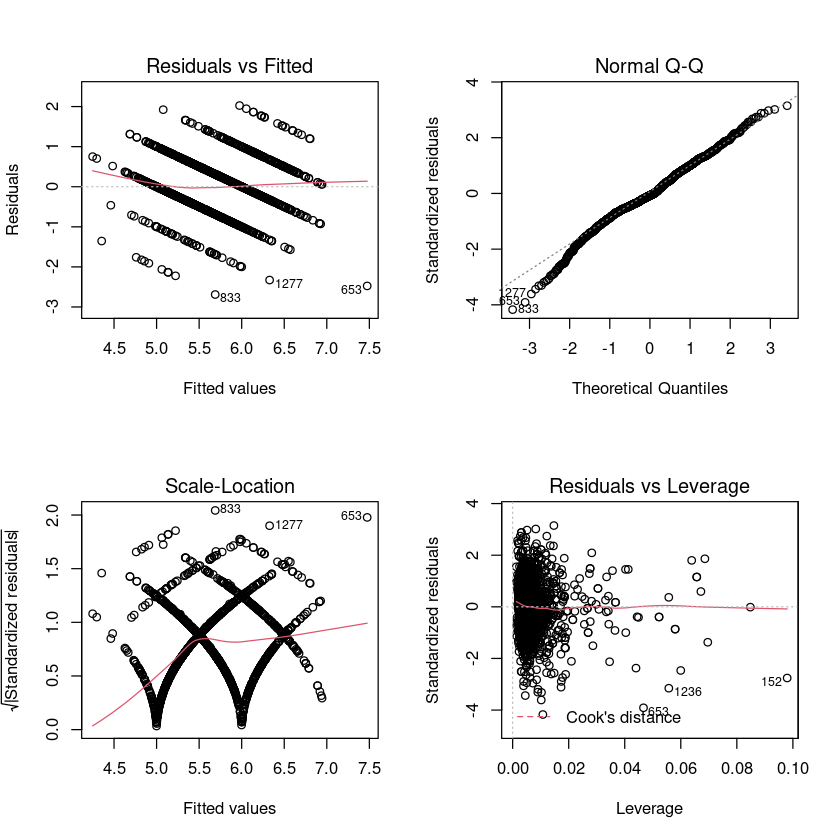

In [46]:
linear.model <- lm(quality ~ ., data = red.wine)
save_red_wine_model_summary(linear.model, "linear_model")
par(mfrow = c(2, 2))
plot(linear.model)

## 选模型

## Box-Cox 变换

## 岭回归

## LASSO回归

## 主成份分析